In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv("heart.csv")

## Preparing

In [82]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [84]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [85]:
df["target"].unique()

array([1, 0], dtype=int64)

In [86]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

## Visualization

<AxesSubplot:xlabel='target', ylabel='count'>

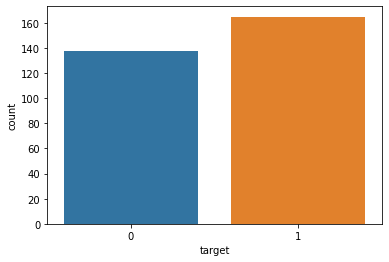

In [87]:
sns.countplot(data=df, x="target")

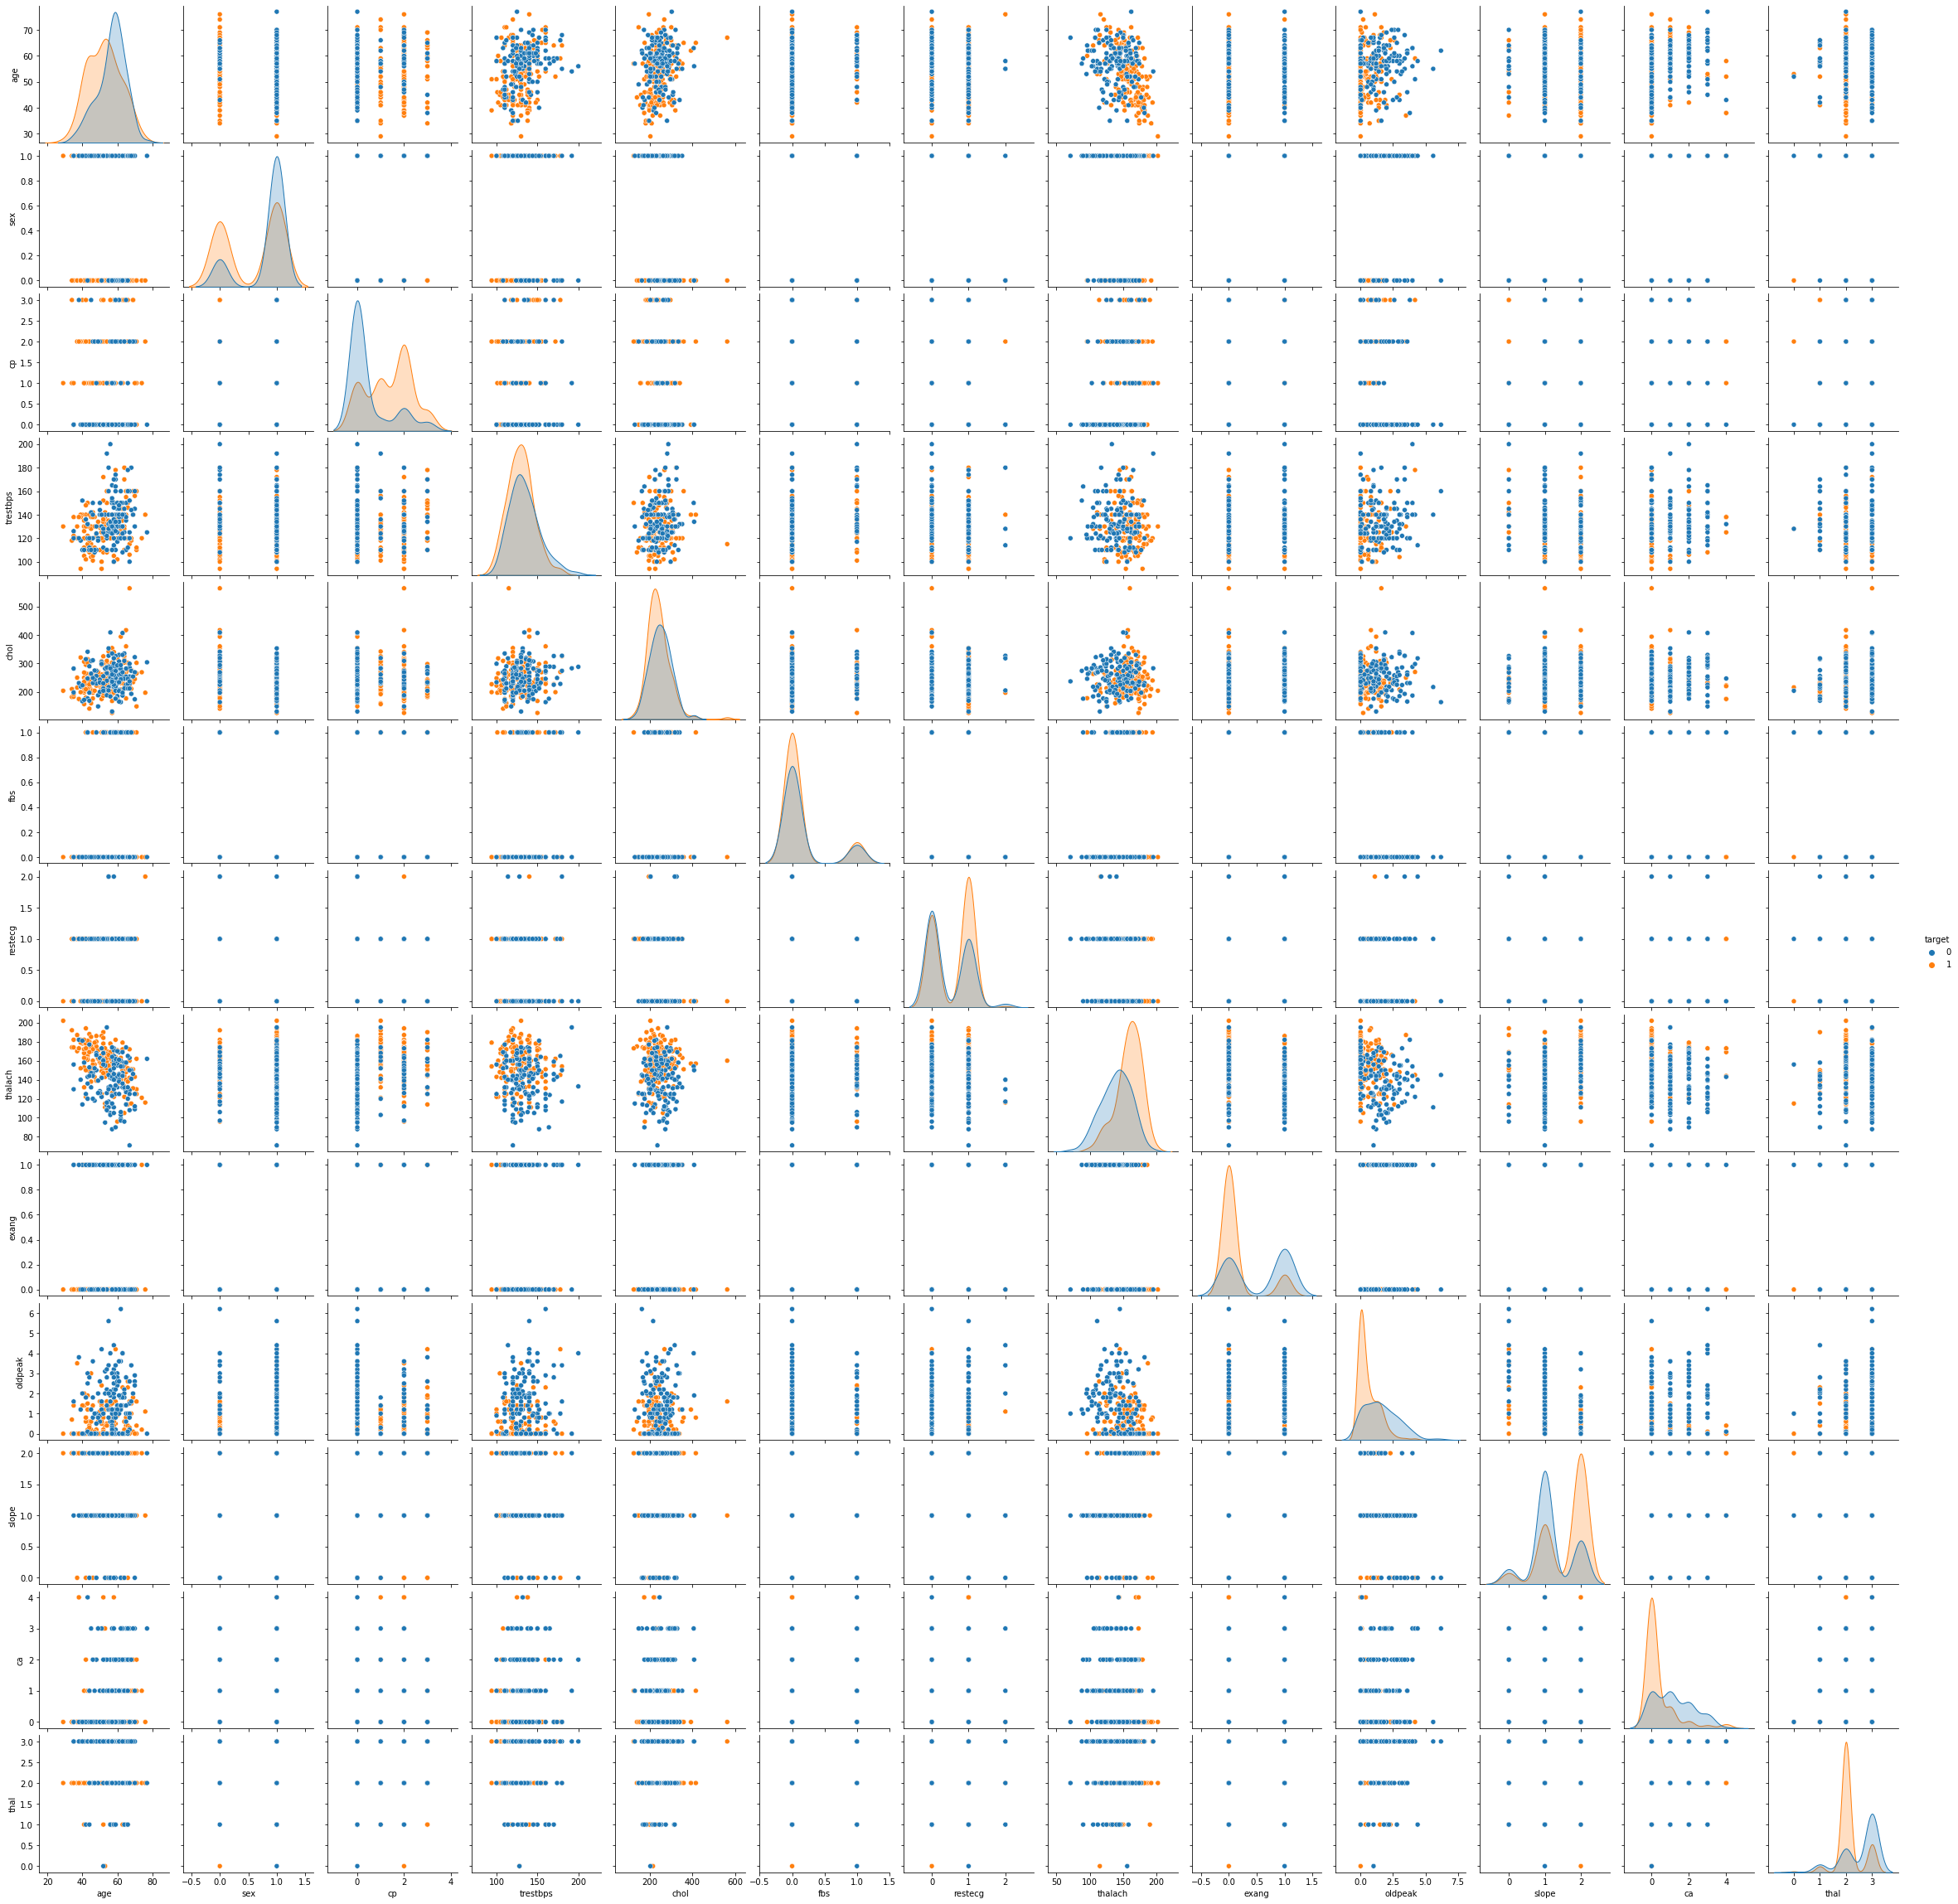

In [88]:
# sns.pairplot(data=df, hue="target")

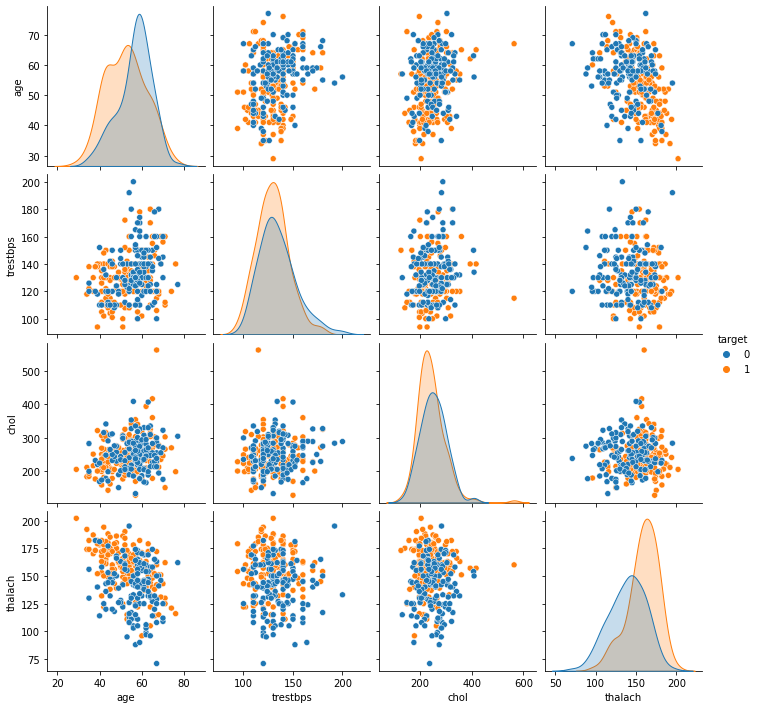

In [89]:
sns.pairplot(df[["age","trestbps","chol","thalach","target"]],hue="target")

<AxesSubplot:>

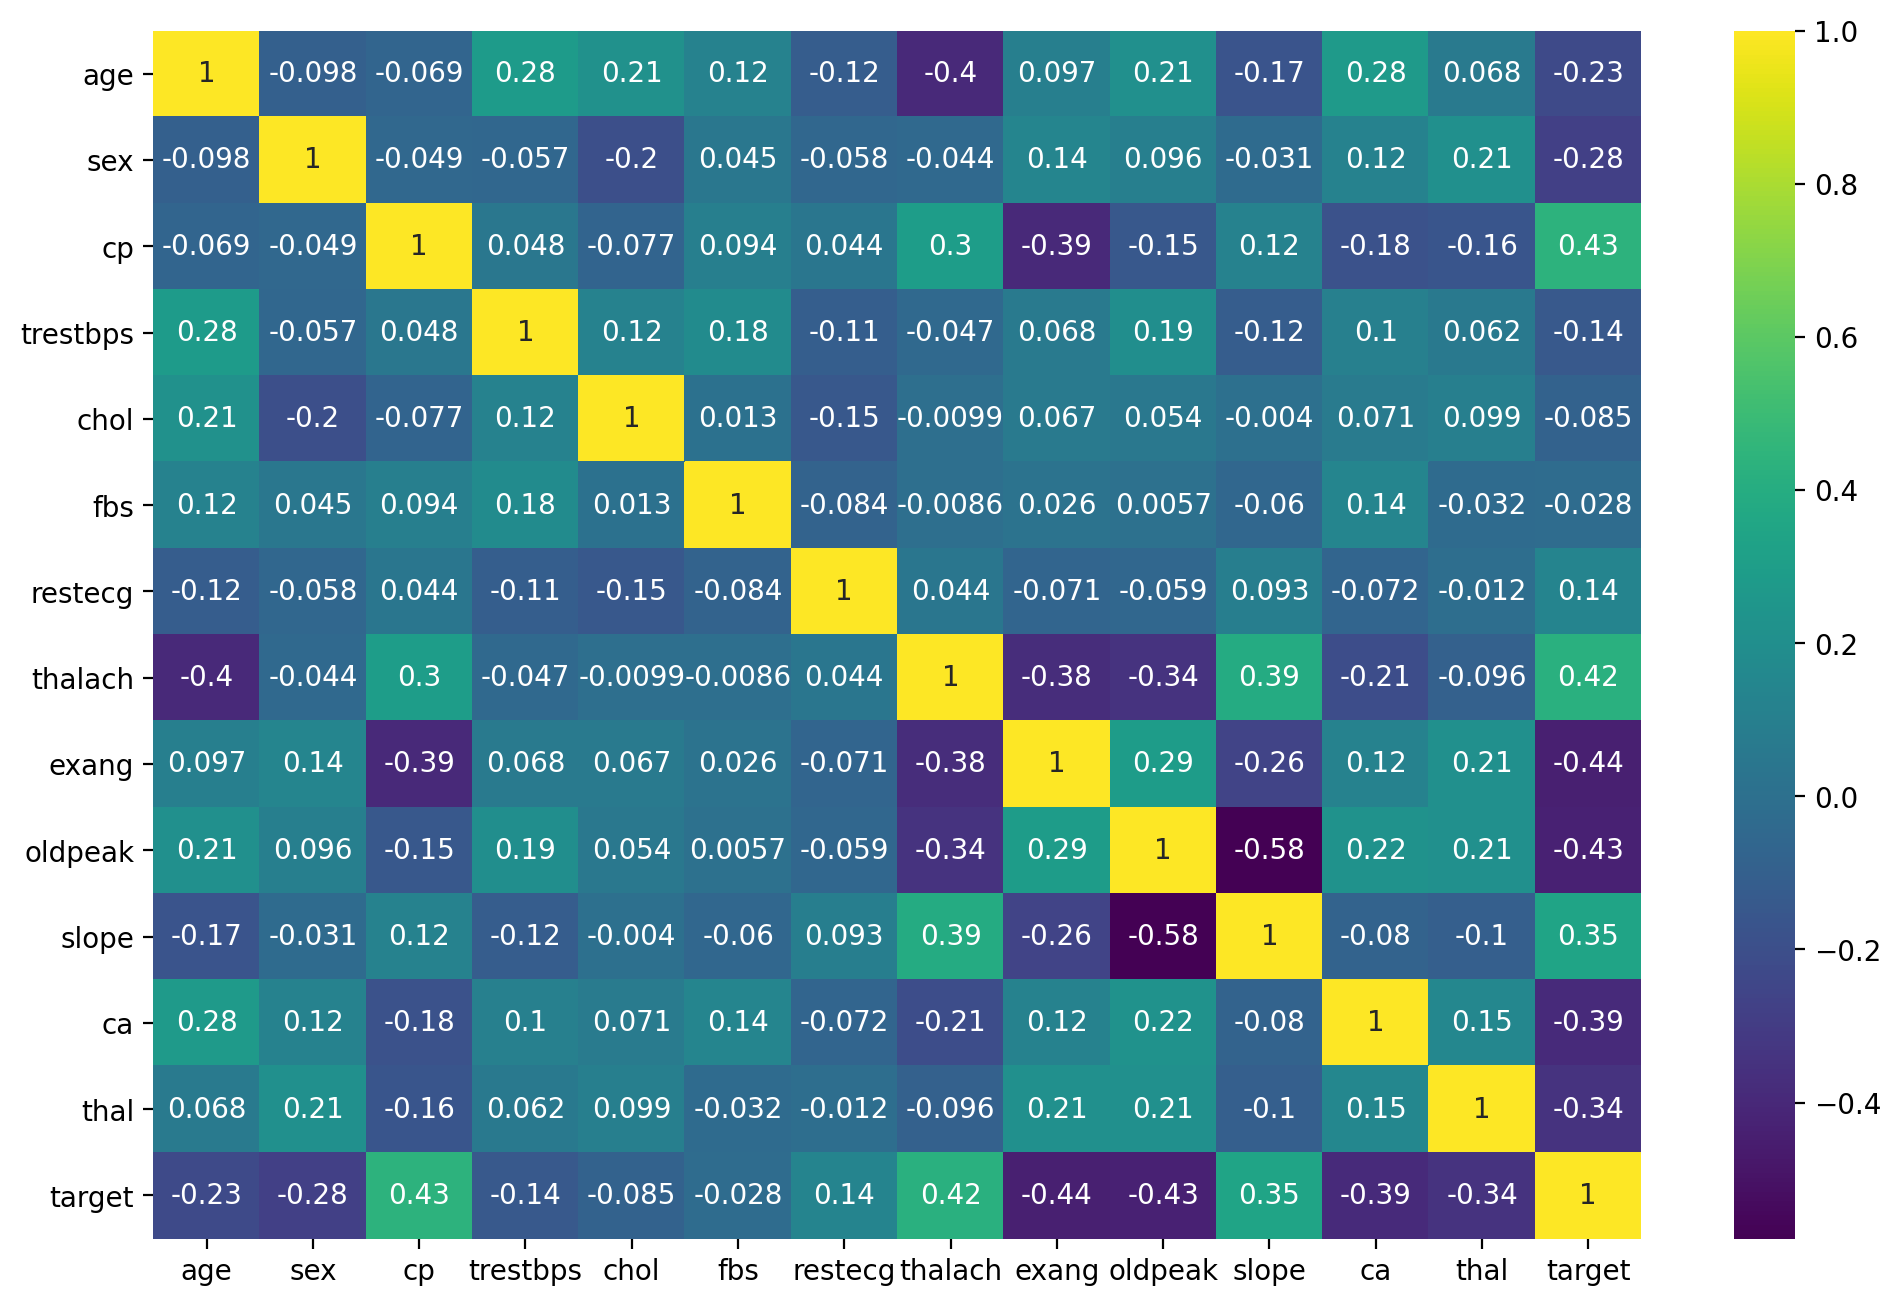

In [90]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df.corr(), annot=True, cmap="viridis")


## ML Data Str

In [91]:
X = df.drop("target", axis=1)
y = df["target"]

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [94]:
scaler = StandardScaler()

In [95]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Regr Model

In [96]:
from sklearn.linear_model import LogisticRegressionCV

In [97]:
log_model = LogisticRegressionCV()

In [98]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [99]:
log_model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [100]:
log_model.C_

array([0.04641589])

In [101]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [102]:
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

## Coefficient Plot

In [103]:
coefs = pd.Series(index=X.columns, data=log_model.coef_[0])
coefs

age        -0.096212
sex        -0.394602
cp          0.535347
trestbps   -0.138502
chol       -0.088305
fbs         0.024873
restecg     0.080838
thalach     0.299141
exang      -0.334382
oldpeak    -0.352386
slope       0.251010
ca         -0.497358
thal       -0.374486
dtype: float64

<AxesSubplot:>

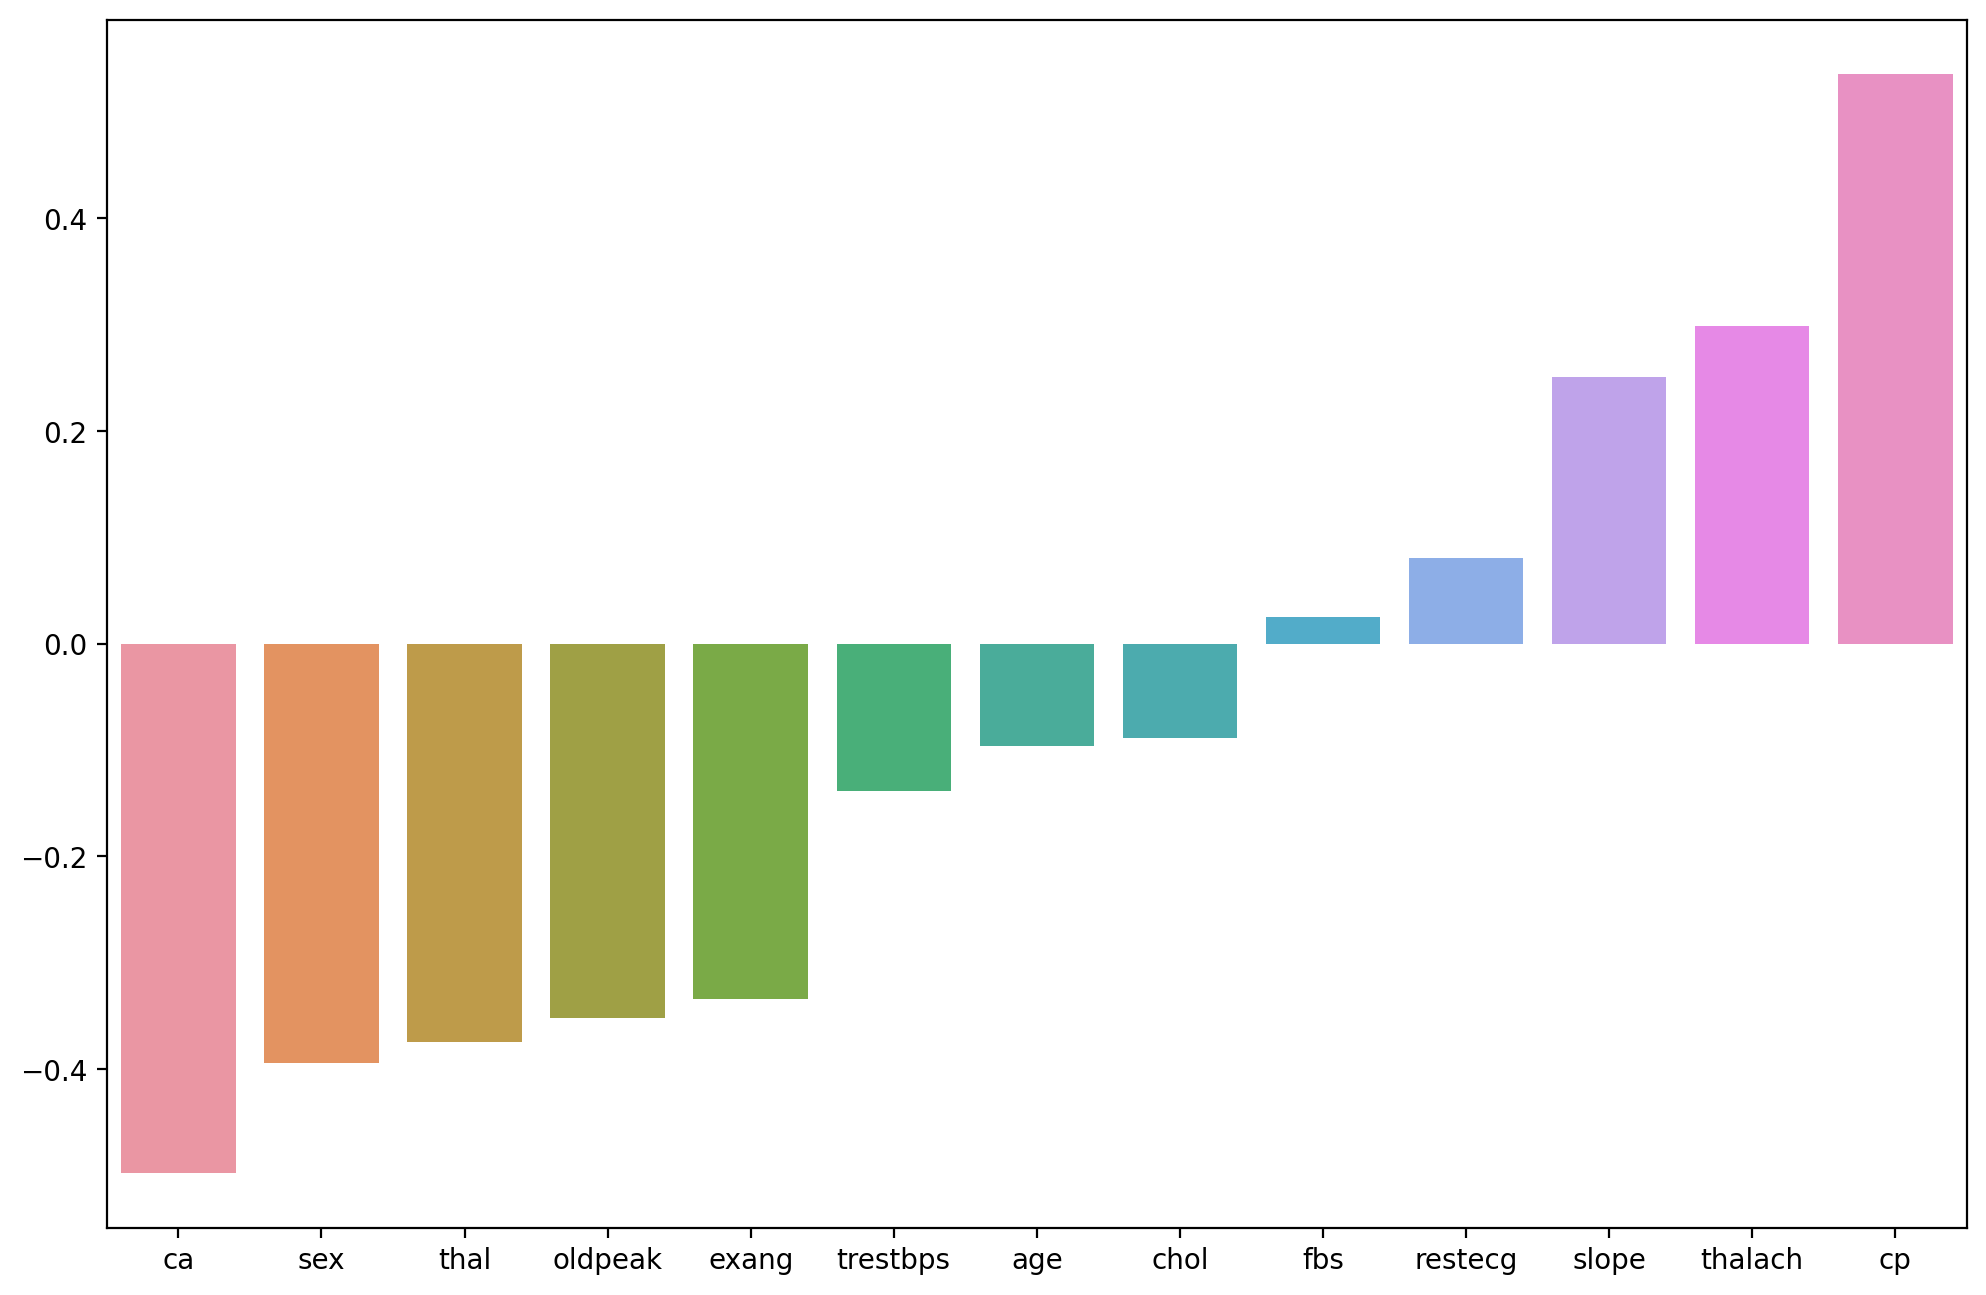

In [104]:
plt.figure(figsize=(12,8),dpi=200)
coefs = coefs.sort_values()
sns.barplot(x=coefs.index, y=coefs.values)

## Evaluation

In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [106]:
y_pred = log_model.predict(scaled_X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [107]:
accuracy_score(y_test,y_pred)

0.8387096774193549

In [108]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

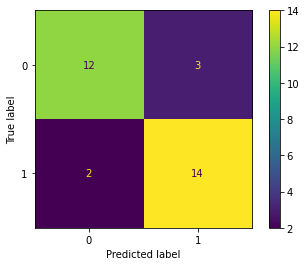

In [109]:
plot_confusion_matrix(log_model, scaled_X_test,y_test)

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



## Performance Curve

In [111]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve

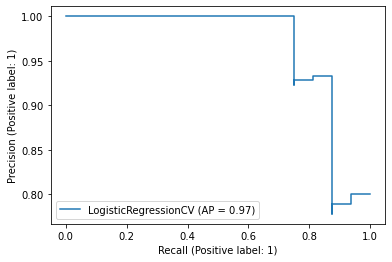

In [112]:
plot_precision_recall_curve(log_model, scaled_X_test,y_test)

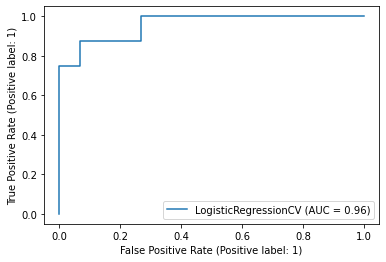

In [113]:
plot_roc_curve(log_model, scaled_X_test,y_test)

## Patient 1

In [114]:
patient_1 = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [115]:
log_model.predict(patient_1)

array([0], dtype=int64)

In [116]:
log_model.predict_proba(patient_1)

array([[9.99999862e-01, 1.38455917e-07]])

## Patient 2

In [140]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='thal', ylabel='target'>

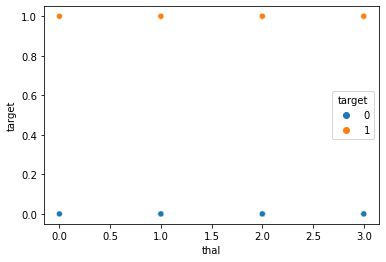

In [172]:
sns.scatterplot(data=df, x="thal", y="target", hue="target")

In [169]:
patient_2=[[25,1,1,120,105,1,0,130,1,3,1,0,1]]

In [170]:
log_model.predict(patient_2)

array([1], dtype=int64)

In [171]:
log_model.predict_proba(patient_2)

array([[7.90429324e-05, 9.99920957e-01]])

In [ ]:
%99.9999818

## Same But Grid search CV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
log_model_2 = LogisticRegression(solver="saga", max_iter=5000)

In [ ]:
penalty = ["l1","l2","elasticnet"]
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)

param_grid={
    "penalty" : penalty,
    "l1_ratio" : l1_ratio,
    "C" : C
}

In [ ]:
grid_model = GridSearchCV(log_model_2,param_grid=param_grid)

In [ ]:
grid_model.fit(scaled_X_train,y_train)

C:\Users\mbatu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\mbatu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\mbatu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\mbatu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\mbatu\anaconda3\lib\sit

GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [ ]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [ ]:
y_pred_2 = grid_model.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8387096774193549

In [ ]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

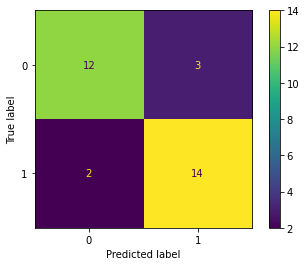

In [ ]:
plot_confusion_matrix(grid_model, scaled_X_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

